'NimbusRoman-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


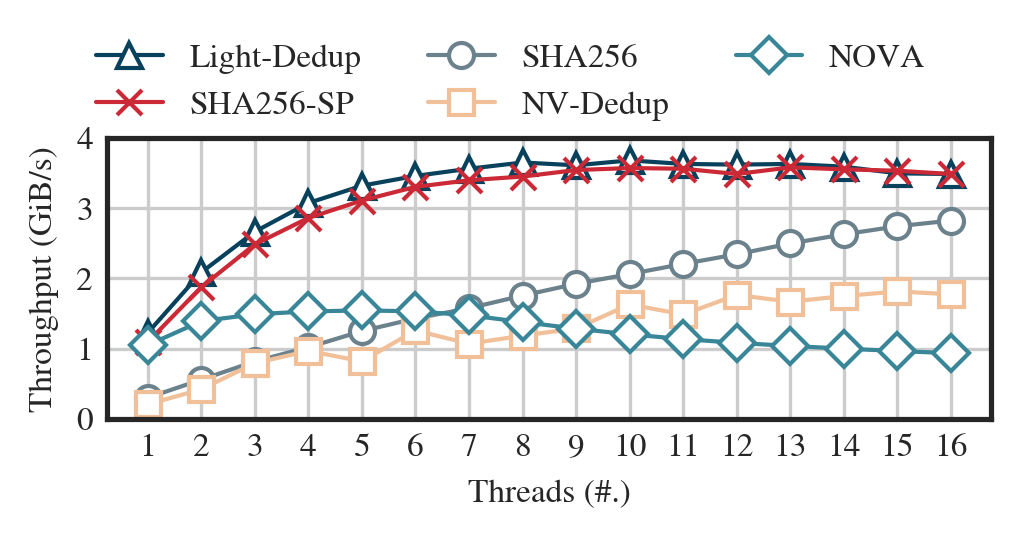

In [1]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import numpy as np

# Paper specific settings
STANDARD_WIDTH = 17.8
SINGLE_COL_WIDTH = STANDARD_WIDTH / 2
DOUBLE_COL_WIDTH = STANDARD_WIDTH
def cm_to_inch(value):
    return value/2.54
    
# matplotlib style settings
matplotlib.rcParams['text.usetex'] = False
style.use('seaborn-white')
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.grid.axis"] = "both"
plt.rcParams["grid.linewidth"] = 0.8
plt.rcParams["font.family"] = "Nimbus Roman"
pd.options.display.max_columns = None
pd.options.display.max_rows = None

# with open("./avg-test-result-multi-in-paper", "r") as f:
with open("./performance-comparison-table", "r") as f:
    df = pd.read_csv(f, delim_whitespace=True, engine='python')

# sort_dict = {
#     "Speculation-64": 0, 
#     "Prefetch-Next": 1,
#     "Transition": 2,
#     "Naive": 3
# }

# sort_df = pd.DataFrame(df['file_system'].map(sort_dict))
# sort_df["num_job"] = df['num_job']
# df = df.iloc[sort_df.sort_values(by = ["file_system", "num_job"]).index]

# Plotting Settings
fig = plt.figure(dpi = 300, figsize = (cm_to_inch(SINGLE_COL_WIDTH), cm_to_inch(4)))
# bar_width = 0.35
# subfig_titles = ["(a) 1 Thread", "(b) 2 Threads", "(c) 4 Threads", "(d) 8 Threads", "(e) 16 Threads"]
# patterns = ['///', '\\\\\\', '', 'XXX', "OOO"]
# Reference: https://designbro.com/blog/inspiration/color-combinations/
line_width = 2
colors = ["#08415c", "#cc2936", "#6b818c", "#f1bf98", "#388697"]
marks = ["^", "x", "o", "s", "D"]
fss = df['file_system'].drop_duplicates().reset_index().drop(columns=['index'])['file_system']
num_jobs = list(range(1, 17))

for idx, fs in enumerate(fss):
    plt.plot(num_jobs, df[df['file_system'] == fs]['second_bw'] / 1024, color=colors[idx], markerfacecolor='white', linewidth=1, label=fs, marker=marks[idx], markeredgecolor=colors[idx])

plt.xticks(num_jobs, fontsize=8)
plt.yticks([0, 1, 2 ,3 ,4], fontsize=8)
fig.legend(fss.map({
    "Light-Dedup": "Light-Dedup", 
    "Light-Dedup(SHA256)": "SHA256",
    "Light-Dedup(SHA256)-SP": "SHA256-SP",
    "NV-Dedup": "NV-Dedup",
    "NOVA": "NOVA"
}), loc='center', ncol=3, bbox_to_anchor=(0.5, 1), fontsize=8)
plt.ylabel("Throughput (GiB/s)", fontsize=8)
plt.xlabel("Threads (#.)", fontsize=8)

plt.tight_layout()
plt.savefig("./FIG-CP.pdf", bbox_inches='tight', pad_inches=0)

# Obsolete Code

In [2]:
# ipython -c "%run plot.ipynb"
import sys
sys.exit(0)

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd

# Paper specific settings
STANDARD_WIDTH = 17.8
SINGLE_COL_WIDTH = STANDARD_WIDTH / 2
DOUBLE_COL_WIDTH = STANDARD_WIDTH
def cm_to_inch(value):
    return value/2.54
    
# matplotlib style settings
matplotlib.rcParams['text.usetex'] = False
style.use('seaborn-white')
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.grid.axis"] = "y"
plt.rcParams["grid.linewidth"] = 0.8
plt.rcParams["font.family"] = "Nimbus Roman"
pd.options.display.max_columns = None
pd.options.display.max_rows = None


# Data Preprocessing
with open("./avg-test-result-in-paper", "r") as f:
    df = pd.read_csv(f, delim_whitespace=True, index_col=None, engine='python')

sort_dict = {
    "Light-Dedup(SHA256)": 0,
    "Light-Dedup(SHA256)-SP": 1,
    "Light-Dedup": 2,
    "NV-Dedup" : 3,  
    "NOVA" :4
}

sort_df = pd.DataFrame(df['file_system'].map(sort_dict))
sort_df["num_job"] = df['num_job']
df = df.iloc[sort_df.sort_values(by = ["file_system", "num_job"]).index]


# Plotting Settings
fig = plt.figure(dpi = 300, figsize = (cm_to_inch(SINGLE_COL_WIDTH), cm_to_inch(4)))
bar_width = 0.2
subfig_titles = ["(a) First copy", "(b) Second copy"]
patterns = ['///', '\\\\\\', '', 'XXX', 'OOO']
# Reference: https://designbro.com/blog/inspiration/color-combinations/
colors = ["#79DAE8", "#0AA1DD", "#CC2936", "#2155CD", "#0A0A0A"]
# "#08415c", "#cc2936", "#6b818c"
marks = ["o", ">", "v", "D", "s"]
for i in range(2):
    subfig = plt.subplot(1, 2, i + 1)
    x = [1, 2, 3, 4, 5]
    x_label = df['num_job'].drop_duplicates().reset_index().drop(columns=['index'])['num_job']
    fss = df['file_system'].drop_duplicates().reset_index().drop(columns=['index'])['file_system']
    tot = len(fss) * bar_width
    fss = fss.to_list()
    # fss.reverse()
    lines = []
    for idx, fs in enumerate(fss):
        # points = []
        # for pivot in x:
        #     point = pivot - tot / 2 + bar_width / 2 + idx * bar_width
        #     points.append(point)
        # plt.bar(points, df[df['file_system'] == fs]['first_bw' if i == 0 else 'second_bw'] / 1024, width=bar_width, hatch=patterns[idx], edgecolor='black', color=colors[idx])
        points = x
        if fs == "Light-Dedup":
            lines += plt.plot(points, df[df['file_system'] == fs]['first_bw' if i == 0 else 'second_bw'] / 1024, marker=marks[idx], markersize=5, color=colors[idx], linewidth=1, markeredgecolor=colors[idx])
        else:
            lines += plt.plot(points, df[df['file_system'] == fs]['first_bw' if i == 0 else 'second_bw'] / 1024, marker=marks[idx], markersize=5, color=colors[idx], markerfacecolor='none', linewidth=1, markeredgecolor=colors[idx])
        plt.yticks([0, 1, 2, 3])
        plt.xticks(x, labels=x_label)

    # fss.reverse()
    # Draw title
    subfig.text(0.5, -0.25, "Threads (#.)", ha='center', va='center', fontsize=7, transform=subfig.transAxes)
    if (i == 0):
        plt.ylabel('Throughput (GiB/s)')
        plt.legend(lines[:3], fss[:3], loc='upper left', ncol=1, fontsize=6)
    else:
        plt.legend(lines[3:], fss[3:], loc='upper left', ncol=1, fontsize=6)
    plt.xlabel(subfig_titles[i], labelpad = 8)  
            
# fig.legend(fss, loc='center', bbox_to_anchor=(0.5, 1), ncol=1, fontsize=6)

plt.tight_layout()
plt.savefig("./FIG-CP.pdf", bbox_inches='tight', pad_inches=0)


SystemExit: 0

/home/deadpool/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3351: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
